In [1]:
%matplotlib inline

import numpy as np

import ghostpy.Invariants.LShell as ls
import ghostpy.algorithms.convert as algx
import ghostpy.algorithms.common as algc
import ghostpy.algorithms.FieldTracers as ft
import ghostpy.algorithms.DipoleField as df
import ghostpy.data.VtkData as vdt
import ghostpy.data.LfmVtkData as lvdt
import ghostpy.data.DipoleData as dpd
import ghostpy.data.GpData as gpd
import ghostpy.plotting.FieldLinePlot as flplt
import ghostpy.Invariants.FieldLine as fl
import csv

import matplotlib.pyplot as plt

In [2]:
path = "/Volumes/8TB Seagate/PhD Data/profiles/"

In [3]:
# data = vdt.VtkData(filename="../unit_tests/test_data/dipole_dp0_3_grid.vts", vector="B")
# data2 = vdt.VtkData(filename="../unit_tests/test_data/lfm_dipole_test_double.vts", vector="B")
# data3 = vdt.VtkData(filename="../unit_tests/test_data/lfm_dipole_test_single.vts", vector="B")
# data4 = vdt.VtkData(filename="../unit_tests/test_data/lfm_dipole_test_quad.vts", vector="B")

dataL1 = vdt.VtkData(filename="../unit_tests/test_data/WHISingle.vts", vector="B")
dataL2 = vdt.VtkData(filename="../unit_tests/test_data/WHIDouble.vts", vector="B")
dataL3 = vdt.VtkData(filename="../unit_tests/test_data/WHIQuad.vts", vector="B")

In [4]:
loc = [8.75,0.0,0.0]
# fl1 = fl.FieldLine(data=data, start=loc, smooth=19)
# fl2 = fl.FieldLine(data=data2, start=loc, smooth=19)
# fl3 = fl.FieldLine(data=data3, start=loc, smooth=19)
# fl4 = fl.FieldLine(data=data4, start=loc, smooth=19)

fl5 = fl.FieldLine(data=dataL1, start=loc, smooth=29)
fl6 = fl.FieldLine(data=dataL2, start=loc, smooth=29)
fl7 = fl.FieldLine(data=dataL3, start=loc, smooth=29)

fl5_0 = fl.FieldLine(data=dataL1, start=loc, smooth=0)
fl6_0 = fl.FieldLine(data=dataL2, start=loc, smooth=0)
fl7_0 = fl.FieldLine(data=dataL3, start=loc, smooth=0)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/jjm390/src/ghostpy/ghostpy/ghostpy/Invariants/FieldLine.py:795: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt(int_list[0] - int_list) * dtrace
/Users/jjm390/src/ghostpy/ghostpy/ghostpy/Invariants/FieldLine.py:689: RuntimeWarning: All-NaN slice encountered
  n_k = np.nanmax([kf,kb], axis=0)


In [5]:
# print (fl1.m_trace_b_mirror)
# print (fl1.K)

# b = fl1.m_trace_b_mirror
# k = fl1.K
# x = np.arange(len(k))/float(len(k))

# b2 = fl2.m_trace_b_mirror
# k2 = fl2.K
# x2 = np.arange((len(k2)))/float(len(k2))


# b3 = fl3.m_trace_b_mirror
# k3 = fl3.K
# x3 = np.arange((len(k3)))/float(len(k3))


# b4 = fl4.m_trace_b_mirror
# k4 = fl4.K
# x4 = np.arange((len(k4)))/float(len(k4))

b5 = fl5.m_trace_b_mirror
k5 = fl5.K
x5 = np.arange((len(k5)))/float(len(k5))


b6 = fl6.m_trace_b_mirror
k6 = fl6.K
x6 = np.arange((len(k6)))/float(len(k6))


b7 = fl7.m_trace_b_mirror
k7 = fl7.K
x7 = np.arange((len(k7)))/float(len(k7))


b5_0 = fl5_0.m_trace_b_mirror
k5_0 = fl5_0.K
x5_0 = np.arange((len(k5_0)))/float(len(k5_0))


b6_0 = fl6_0.m_trace_b_mirror
k6_0 = fl6_0.K
x6_0 = np.arange((len(k6_0)))/float(len(k6_0))


b7_0 = fl7_0.m_trace_b_mirror
k7_0 = fl7_0.K
x7_0 = np.arange((len(k7_0)))/float(len(k7_0))

In [6]:
# fig = plt.figure(figsize=(10,5))
# ax = fig.add_subplot(111)

# # ax.semilogy(x,k, 'y--', lw=1, label="K - rect. Grid")
# # ax.semilogy(x,b, 'y', lw=1, label="B - rect. Grid")

# ax.semilogy(x3,k3, 'b--', lw=1, label="K - Single Res")
# ax.semilogy(x3,b3, 'b', lw=1, label="B - Single Res")

# ax.semilogy(x2,k2, 'k--', lw=1, label="K - Double Res")
# ax.semilogy(x2,b2, 'k', lw=1, label="B - Double Res")

# ax.semilogy(x4,k4, 'r--', lw=1, label="K - Quad Res")
# ax.semilogy(x4,b4, 'r', lw=1, label="B - Quad Res")

# ax.set_title("Comparison of K/B for varying LFM Resolution (DIPOLE)\n Line through {}".format(loc))
# ax.set_ylabel("Value (B or K)")
# ax.set_xlabel("Relative Position in Trace")
# plt.legend(loc=4, fontsize=7.5)
# plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
# plt.show()

# fig.savefig(path+"BKLFMres.pdf")

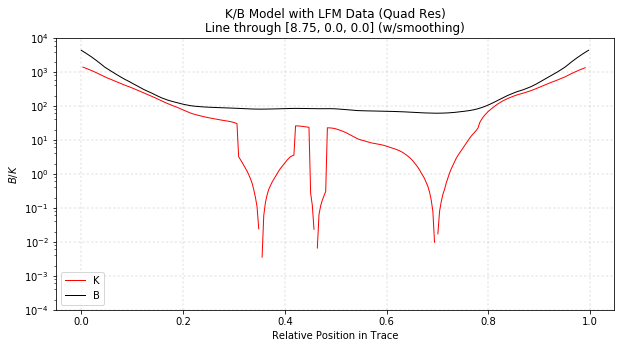

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# ax.semilogy(x,k, 'y--', lw=1, label="K - rect. Grid")
# ax.semilogy(x,b, 'y', lw=1, label="B - rect. Grid")

# ax.semilogy(x5_0,k5_0, 'b--', lw=1, label="K - Single Res")
# ax.semilogy(x5_0,b5_0, 'b', lw=1, label="B - Single Res")

# ax.semilogy(x6_0,k6_0, 'r', lw=1, label="K - Double Res")
# ax.semilogy(x6_0,b6_0, 'k', lw=1, label="B - Double Res")

line1, = ax.semilogy(x7,k7, 'r-', lw=1, label="K - Quad Res")
line2, = ax.semilogy(x7,b7, 'k', lw=1, label="B - Quad Res")
ax.set_ylim([1e-4, 1e4])
ax.set_title("K/B Model with LFM Data (Quad Res)\nLine through {} (w/smoothing)".format(loc))
ax.set_ylabel("$B/K$")
ax.set_xlabel("Relative Position in Trace")
ax.set_ylim([1e-4,1e4])
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.legend([line1,line2], ["K","B"])
plt.show()

fig.savefig(path+"BKLFMres2Quad.pdf")

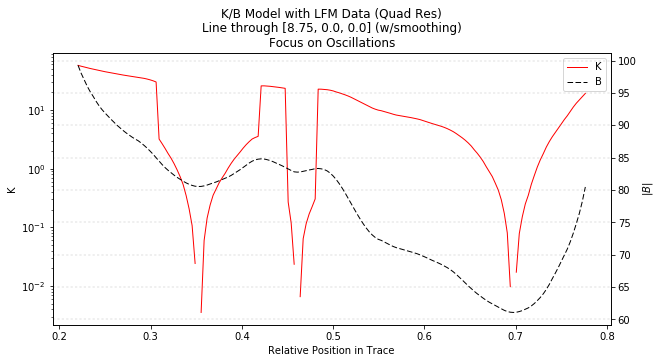

In [10]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# ax.semilogy(x,k, 'y--', lw=1, label="K - rect. Grid")
# ax.semilogy(x,b, 'y', lw=1, label="B - rect. Grid")

# ax.semilogy(x5_0,k5_0, 'b--', lw=1, label="K - Single Res")
# ax.semilogy(x5_0,b5_0, 'b', lw=1, label="B - Single Res")

# ax.semilogy(x6_0,k6_0, 'r', lw=1, label="K - Double Res")
# ax.semilogy(x6_0,b6_0, 'k', lw=1, label="B - Double Res")

line1, = ax.semilogy(x7[67:-67],k7[67:-67], 'r-', lw=1, label="K - Quad Res")
ax2 = ax.twinx()
line2, = ax2.plot(x7[67:-67],b7[67:-67], 'k--', lw=1, label="B - Quad Res")
ax2.set_ylabel("$|B|$")
ax.set_ylabel("K")

ax.set_title("K/B Model with LFM Data (Quad Res)\nLine through {} (w/smoothing)\nFocus on Oscillations".format(loc))
ax.set_xlabel("Relative Position in Trace")
# ax.set_ylim([1e-4,1e4])
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.legend([line1,line2], ["K","B"])
plt.show()

fig.savefig(path+"BKLFMres2OscFocusQuad.pdf")

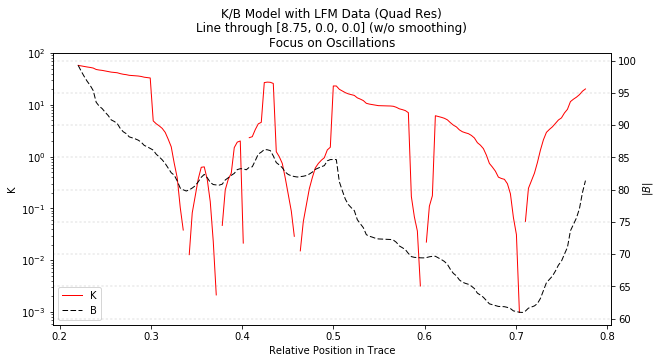

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# ax.semilogy(x,k, 'y--', lw=1, label="K - rect. Grid")
# ax.semilogy(x,b, 'y', lw=1, label="B - rect. Grid")

# ax.semilogy(x5_0,k5_0, 'b--', lw=1, label="K - Single Res")
# ax.semilogy(x5_0,b5_0, 'b', lw=1, label="B - Single Res")

# ax.semilogy(x6_0,k6_0, 'r', lw=1, label="K - Double Res")
# ax.semilogy(x6_0,b6_0, 'k', lw=1, label="B - Double Res")

line1, = ax.semilogy(x7_0[67:-67],k7_0[67:-67], 'r-', lw=1, label="K - Quad Res")
ax2 = ax.twinx()
line2, = ax2.plot(x7_0[67:-67],b7_0[67:-67], 'k--', lw=1, label="B - Quad Res")
ax2.set_ylabel("$|B|$")
ax.set_ylabel("K")

ax.set_title("K/B Model with LFM Data (Quad Res)\nLine through {} (w/o smoothing)\nFocus on Oscillations".format(loc))
ax.set_xlabel("Relative Position in Trace")
# ax.set_ylim([1e-4,1e4])
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.legend([line1,line2], ["K","B"])
plt.show()

fig.savefig(path+"BKLFMres2_raw_OsFocusQuad.pdf")

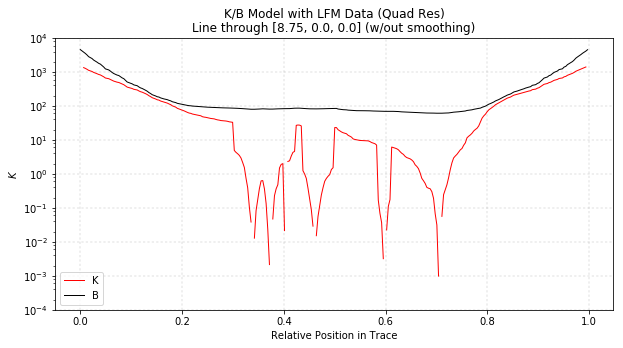

In [12]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# ax.semilogy(x,k, 'y--', lw=1, label="K - rect. Grid")
# ax.semilogy(x,b, 'y', lw=1, label="B - rect. Grid")

# ax.semilogy(x5_0,k5_0, 'b--', lw=1, label="K - Single Res")
# ax.semilogy(x5_0,b5_0, 'b', lw=1, label="B - Single Res")

# ax.semilogy(x6_0,k6_0, 'r', lw=1, label="K - Double Res")
# ax.semilogy(x6_0,b6_0, 'k', lw=1, label="B - Double Res")

line1, = ax.semilogy(x7_0,k7_0, 'r-', lw=1, label="K - Quad Res")
line2, = ax.semilogy(x7_0,b7_0, 'k', lw=1, label="B - Quad Res")
ax2.set_ylabel("$|B|$")
ax.set_ylim([1e-4, 1e4])
ax.set_title("K/B Model with LFM Data (Quad Res)\nLine through {} (w/out smoothing)".format(loc))
ax.set_ylabel("$K$")
ax.set_xlabel("Relative Position in Trace")
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.legend([line1,line2], ["K","B"])
plt.show()

fig.savefig(path+"BKLFMres2_rawQuad.pdf")

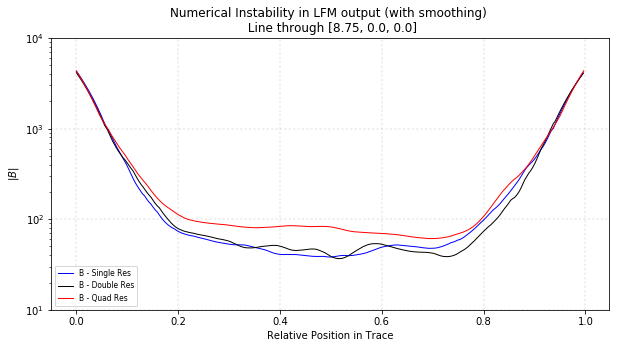

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# ax.semilogy(x,k, 'y--', lw=1, label="K - rect. Grid")
# ax.semilogy(x,b, 'y', lw=1, label="B - rect. Grid")

# ax.semilogy(x5,k5, 'b--', lw=1, label="K - Single Res")
ax.semilogy(x5,b5, 'b', lw=1, label="B - Single Res")

# ax.semilogy(x6,k6, 'k--', lw=1, label="K - Double Res")
ax.semilogy(x6,b6, 'k', lw=1, label="B - Double Res")

# ax.semilogy(x7,k7, 'r--', lw=1, label="K - Quad Res")
ax.semilogy(x7,b7, 'r', lw=1, label="B - Quad Res")

ax.set_title("Numerical Instability in LFM output (with smoothing) \n Line through {}".format(loc))
ax.set_ylabel("$|B|$")
ax.set_xlabel("Relative Position in Trace")
ax.set_ylim([10,1e4])
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
plt.legend(loc='best', fontsize=7.5)
plt.show()

fig.savefig(path+"BinstabilityLFM.pdf")

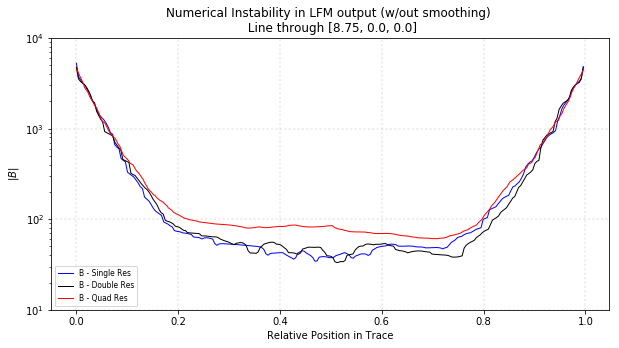

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# ax.semilogy(x,k, 'y--', lw=1, label="K - rect. Grid")
# ax.semilogy(x,b, 'y', lw=1, label="B - rect. Grid")

# ax.semilogy(x5,k5, 'b--', lw=1, label="K - Single Res")
ax.semilogy(x5_0,b5_0, 'b', lw=1, label="B - Single Res")

# ax.semilogy(x6,k6, 'k--', lw=1, label="K - Double Res")
ax.semilogy(x6_0,b6_0, 'k', lw=1, label="B - Double Res")

# ax.semilogy(x7,k7, 'r--', lw=1, label="K - Quad Res")
ax.semilogy(x7_0,b7_0, 'r', lw=1, label="B - Quad Res")

ax.set_title("Numerical Instability in LFM output (w/out smoothing) \n Line through {}".format(loc))
ax.set_ylabel("$|B|$")
ax.set_xlabel("Relative Position in Trace")
ax.set_ylim([10,1e4])
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
plt.legend(loc='best', fontsize=7.5)
plt.show()

fig.savefig(path+"BinstabilityLFM_raw.pdf")